In [1]:
import pandas as pd
import matplotlib
import numpy as np
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
data = pd.read_csv('/Users/nupursolanki/Desktop/machine_learning_modelling/data/creditcard.csv')

# **Exploratory Data Analysis**

In [4]:
data = data.round(3)
print(data.shape)

(284807, 31)


In [5]:
print(data.head(5))

   Time     V1     V2     V3     V4     V5     V6     V7     V8     V9  ...  \
0   0.0 -1.360 -0.073  2.536  1.378 -0.338  0.462  0.240  0.099  0.364  ...   
1   0.0  1.192  0.266  0.166  0.448  0.060 -0.082 -0.079  0.085 -0.255  ...   
2   1.0 -1.358 -1.340  1.773  0.380 -0.503  1.800  0.791  0.248 -1.515  ...   
3   1.0 -0.966 -0.185  1.793 -0.863 -0.010  1.247  0.238  0.377 -1.387  ...   
4   2.0 -1.158  0.878  1.549  0.403 -0.407  0.096  0.593 -0.271  0.818  ...   

     V21    V22    V23    V24    V25    V26    V27    V28  Amount  Class  
0 -0.018  0.278 -0.110  0.067  0.129 -0.189  0.134 -0.021  149.62      0  
1 -0.226 -0.639  0.101 -0.340  0.167  0.126 -0.009  0.015    2.69      0  
2  0.248  0.772  0.909 -0.689 -0.328 -0.139 -0.055 -0.060  378.66      0  
3 -0.108  0.005 -0.190 -1.176  0.647 -0.222  0.063  0.061  123.50      0  
4 -0.009  0.798 -0.137  0.141 -0.206  0.502  0.219  0.215   69.99      0  

[5 rows x 31 columns]


In [6]:
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  2.808920e-08 -3.300481e-07 -6.074289e-07  1.931132e-07   
std     47488.145955  1.958696e+00  1.651308e+00  1.516256e+00  1.415869e+00   
min         0.000000 -5.640800e+01 -7.271600e+01 -4.832600e+01 -5.683000e+00   
25%     54201.500000 -9.200000e-01 -5.990000e-01 -8.900000e-01 -8.490000e-01   
50%     84692.000000  1.800000e-02  6.500000e-02  1.800000e-01 -2.000000e-02   
75%    139320.500000  1.316000e+00  8.040000e-01  1.027000e+00  7.430000e-01   
max    172792.000000  2.455000e+00  2.205800e+01  9.383000e+00  1.687500e+01   

                 V5             V6            V7            V8            V9  \
count  2.848070e+05  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -3.054700e-07      -0.000001 -6.565850e-07  9.128989e-08 -1.474683e-07   
std    1.380247e+00       1.332272  1.2

In [7]:
class_count = data['Class'].value_counts()
print(class_count)

0    284315
1       492
Name: Class, dtype: int64


**Visualizations:**

**1. Heatmap of Correlation**

Text(0.5, 1.0, 'Heatmap of Correlation')

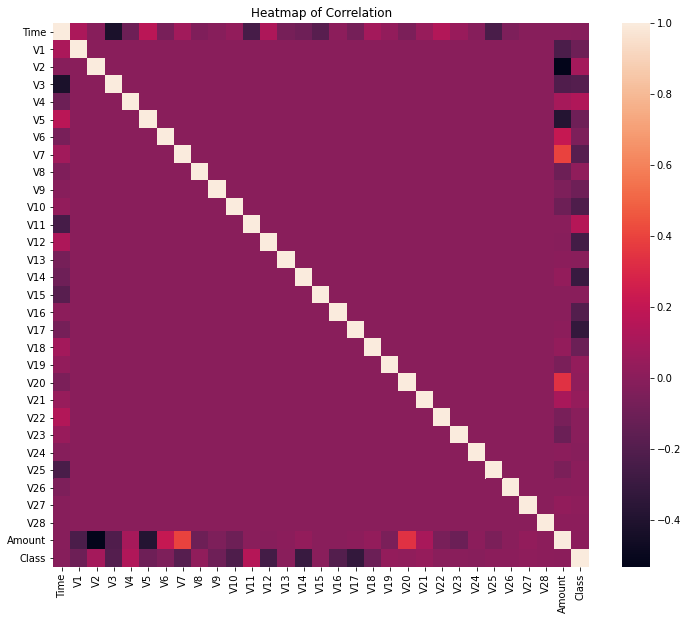

In [8]:
corr = data.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

**Amount Statistics**

In [9]:
amt_stats = data['Amount'].describe()
print(amt_stats)

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64




We see that the 75th %tile amount is 77 whereas maximum is ~25k. So there are outliers. Lets further check how many outliers are there.

In [10]:
d1 = data.loc[(data['Amount']>2000) & (data['Class'] ==1)]

We will keep only data where amount is less than 10000 to remove outliers.

In [11]:
print(d1)

            Time     V1     V2     V3    V4     V5     V6    V7     V8    V9  \
176049  122608.0 -2.003 -7.159 -4.051  1.31 -2.058 -0.099  2.88 -0.727  1.46   

        ...    V21    V22    V23    V24    V25    V26    V27    V28   Amount  \
176049  ...  1.244 -1.015 -1.801  0.658 -0.436 -0.895 -0.398  0.314  2125.87   

        Class  
176049      1  

[1 rows x 31 columns]


In [12]:
data=data.loc[data['Amount']<8000]

**Time stats and distribution**

In [13]:
time_stats = data['Time'].describe()
print(time_stats)

count    284795.000000
mean      94813.167148
std       47487.985425
min           0.000000
25%       54201.500000
50%       84691.000000
75%      139320.000000
max      172792.000000
Name: Time, dtype: float64


Text(0, 0.5, 'Amount')

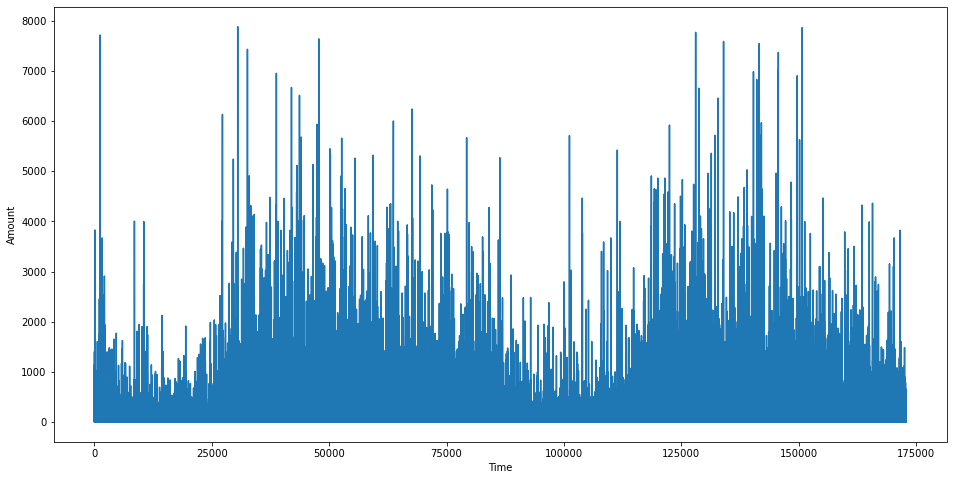

In [14]:
plt.figure(figsize=(16,8))
plt.plot(data['Time'],data['Amount'])
plt.xlabel('Time')
plt.ylabel('Amount')

The x axis is the time in seconds from time 0. There is some cyclicity here which can be attributed to the time of day. Since this is transaction data over 2 days the increase in amount is higher during daytime (~7th hour to 20th Hour) which makes sense. 

In [15]:
fraud_df = data.loc[data['Class']==1]
fraud_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,80746.806911,-4.771937,3.623789,-7.033274,4.542028,-3.151232,-1.397722,-5.568713,0.570648,-2.581128,...,0.713606,0.014045,-0.040297,-0.105114,0.041431,0.051650,0.170598,0.075667,122.211321,1.0
std,47835.365138,6.783700,4.291204,7.110964,2.873324,5.372473,1.858124,7.206761,6.797792,2.500895,...,3.869327,1.494592,1.579657,0.515570,0.797217,0.471698,1.376767,0.547293,256.683288,0.0
min,406.000000,-30.552000,-8.402000,-31.104000,-1.313000,-22.106000,-6.406000,-43.557000,-41.044000,-13.434000,...,-22.798000,-8.887000,-19.254000,-2.028000,-4.782000,-1.153000,-7.263000,-1.869000,0.000000,1.0
25%,41241.500000,-6.035750,1.188500,-8.643750,2.372750,-4.792750,-2.501750,-7.965000,-0.195500,-3.872250,...,0.042000,-0.533500,-0.342250,-0.437250,-0.314000,-0.259500,-0.020250,-0.109000,1.000000,1.0
50%,75568.500000,-2.342500,2.718000,-5.075000,4.177500,-1.523000,-1.425000,-3.034500,0.621500,-2.208500,...,0.592500,0.048500,-0.073000,-0.060500,0.088500,0.004000,0.395000,0.146500,9.250000,1.0
75%,128483.000000,-0.419250,4.971250,-2.276250,6.349000,0.214750,-0.413500,-0.945500,1.764500,-0.787500,...,1.244500,0.617250,0.308250,0.285250,0.456500,0.397000,0.826250,0.381000,105.890000,1.0
max,170348.000000,2.132000,22.058000,2.250000,12.115000,11.095000,6.474000,5.803000,20.007000,3.354000,...,27.203000,8.362000,5.466000,1.091000,2.208000,2.745000,3.052000,1.779000,2125.870000,1.0


We segregated the fraudulent data to do some visualizations and see if we can find any significant pattern in there.

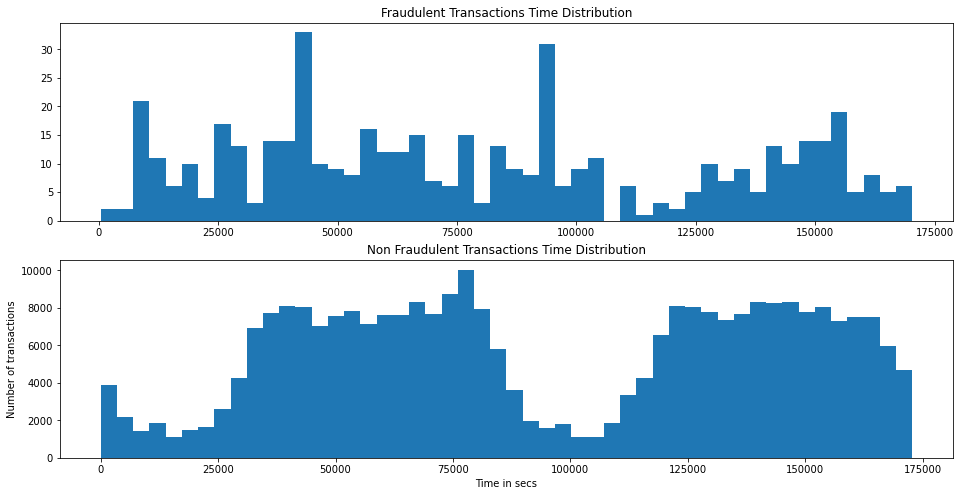

In [16]:
f,(ax1,ax2)=plt.subplots(2,1,figsize=(16,8))
ax1.hist(data.Time[data.Class==1],bins=50)
ax1.set_title("Fraudulent Transactions Time Distribution")
ax2.hist(data.Time[data.Class==0],bins=50)
ax2.set_title("Non Fraudulent Transactions Time Distribution")
plt.xlabel('Time in secs')
plt.ylabel('Number of transactions')
plt.show()

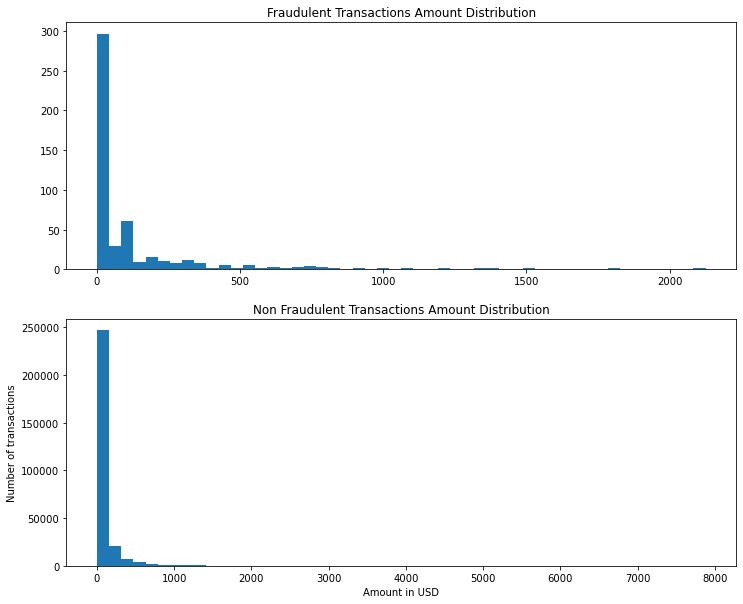

In [17]:
f,(ax1,ax2)=plt.subplots(2,1,figsize=(12,10))
ax1.hist(data.Amount[data.Class==1],bins=50)
ax1.set_title("Fraudulent Transactions Amount Distribution")
ax2.hist(data.Amount[data.Class==0],bins=50)
ax2.set_title("Non Fraudulent Transactions Amount Distribution")
plt.xlabel('Amount in USD')
plt.ylabel('Number of transactions')
plt.show()

The dataset is a Kaggle dataset which has transaction data over 2 days with around 28 features which are transformed by PCA.Due to this we have no identity for them except for 2 variables that are time and Amount. After doing some high level data exploration and looking at statistics we draw the following observations:

1. It is highly unbalanced data. ~280k transactions out of which only 492 are fraudulent.  Due to the disparity of classes in the variables, (99.9% non fraud vs 0.1% fraud ) any algorithm will categorize results into the class with more instances, (here non-fraud) while at the same time giving the false sense of a highly accurate model. So our first problem is to solve this issue of unbalanced data. We will solve this by reviewing different sampling techniques and implementing them to see which one gives better results. 
2. Since most of the data is PCA transformed we do not have descriptive attributes of any of the 28 features. However looking at the distributions of the amount we might remove some extreme outliers wrt to the amount. Since the mean amount is 88 and the maximum is 25000 the outliers will essentially affect the results. We also need to consider standardizing the amount and time variable by scaling it.

For our next steps we will focus on sampling, scaling and then applying classification algorithms like logistic regressions, decision tree classifier and random forest with xgboost to see which method is most helpful in detecting fraudulent transactions and why. 